<a href="https://colab.research.google.com/github/HoangThangCDT/Homework/blob/main/Predict_FACE_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/drive/folders/1FSEJqcZk3t54Ava809wb0alFUNteQkMJ?usp=sharing

In [17]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [18]:
im_shape = (150,150)

TRAINING_DIR = '../content/drive/MyDrive/FACE/Train'
TEST_DIR = '../content/drive/MyDrive/FACE/Test'

seed = 10

BATCH_SIZE = 16

In [19]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [20]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [21]:
# Generator data train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator data validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 525 images belonging to 8 classes.
Found 127 images belonging to 8 classes.
Found 120 images belonging to 8 classes.
Classes: ['HUY', 'KIET', 'LÂN', 'LIENHUULOC', 'LOC', 'LONGBUI', 'THANG', 'loNG130']


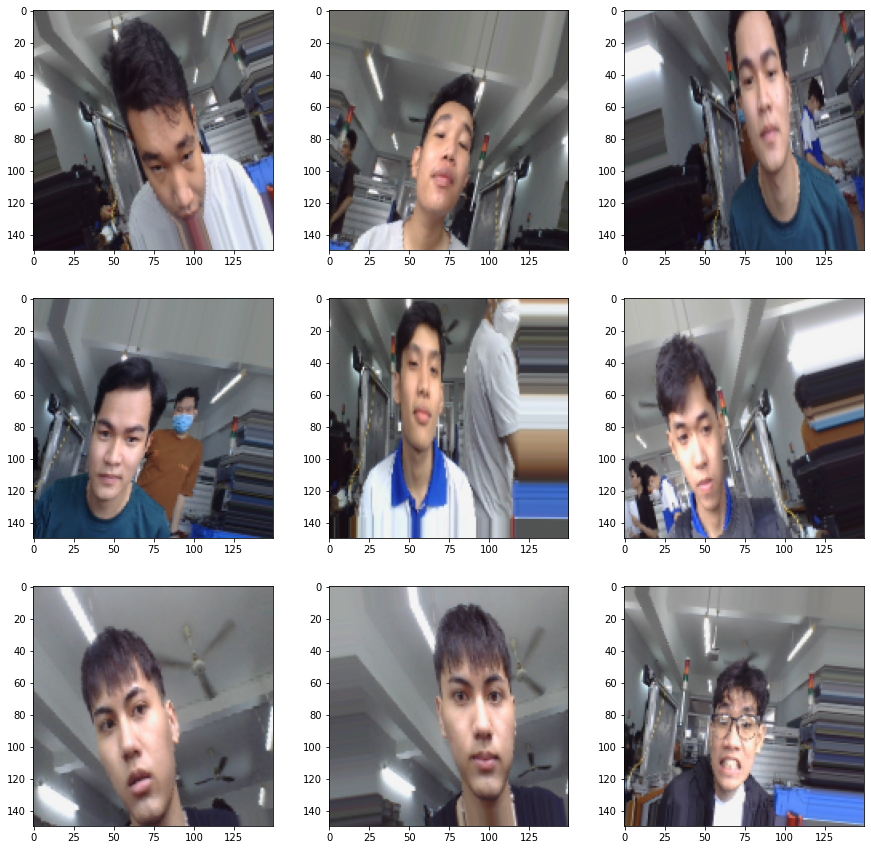

In [22]:
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 331776)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               42467456  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [24]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=20,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/20
32/32 [==============================] - 35s 1s/step - loss: 4.0513 - accuracy: 0.2200 - val_loss: 1.3130 - val_accuracy: 0.5625
Epoch 2/20
32/32 [==============================] - 34s 1s/step - loss: 1.2860 - accuracy: 0.5540 - val_loss: 0.5525 - val_accuracy: 0.9018
Epoch 3/20
32/32 [==============================] - 34s 1s/step - loss: 0.7656 - accuracy: 0.7466 - val_loss: 0.2138 - val_accuracy: 0.8929
Epoch 4/20
32/32 [==============================] - 34s 1s/step - loss: 0.5410 - accuracy: 0.8251 - val_loss: 0.0804 - val_accuracy: 1.0000
Epoch 5/20
32/32 [==============================] - 35s 1s/step - loss: 0.4708 - accuracy: 0.8291 - val_loss: 0.0848 - val_accuracy: 0.9821
Epoch 6/20
32/32 [==============================] - 34s 1s/step - loss: 0.2929 - accuracy: 0.8978 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 34s 1s/step - loss: 0.3300 - accuracy: 0.8821 - val_loss: 0.0975 - val_accuracy: 0.9643
Epoch 8/20
32/32 [==

In [25]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [26]:
model.save('/content/drive/MyDrive/final3.h')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/final3.h/assets


In [27]:
model5 = tf.keras.models.load_model('/content/drive/MyDrive/final3.h')

Ai Day !!!


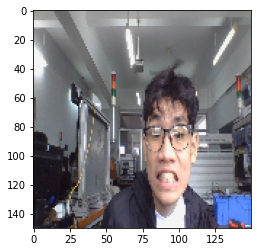

In [48]:
img=load_img('/content/drive/MyDrive/FACE/pred/pred3.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
#classes[np.argmax(model5.predict(img),axis=1)[0]]
if np.argmax(model5.predict(img),axis=1)[0]==6:
  print('Hoang Thang')
if np.argmax(model5.predict(img),axis=1)[0]!=6:
  print('Ai Day !!!')

Hoang Thang


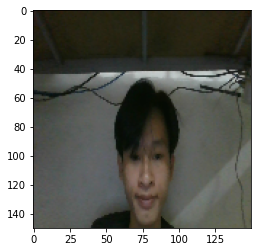

In [49]:
img=load_img('/content/drive/MyDrive/FACE/pred/pred1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
#classes[np.argmax(model5.predict(img),axis=1)[0]]
if np.argmax(model5.predict(img),axis=1)[0]==6:
  print('Hoang Thang')
if np.argmax(model5.predict(img),axis=1)[0]!=6:
  print('Ai Day !!!')

Ai Day !!!


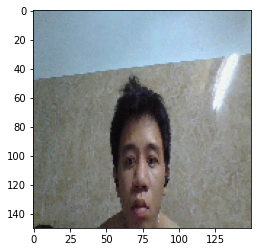

In [50]:
img=load_img('/content/drive/MyDrive/FACE/pred/pred2.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
#classes[np.argmax(model5.predict(img),axis=1)[0]]
if np.argmax(model5.predict(img),axis=1)[0]==6:
  print('Hoang Thang')
if np.argmax(model5.predict(img),axis=1)[0]!=6:
  print('Ai Day !!!')

Ai Day !!!


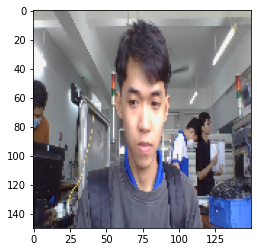

In [51]:
img=load_img('/content/drive/MyDrive/FACE/pred/pred4.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
#classes[np.argmax(model5.predict(img),axis=1)[0]]
if np.argmax(model5.predict(img),axis=1)[0]==6:
  print('Hoang Thang')
if np.argmax(model5.predict(img),axis=1)[0]!=6:
  print('Ai Day !!!')